In [ ]:
import pandas as pd

benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierra_leone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')


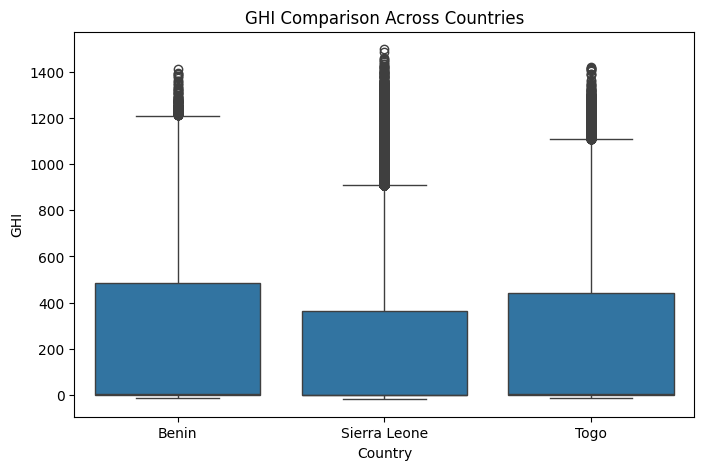

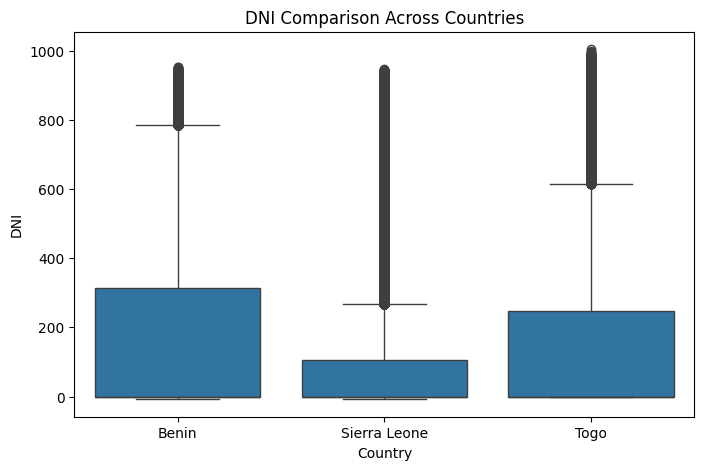

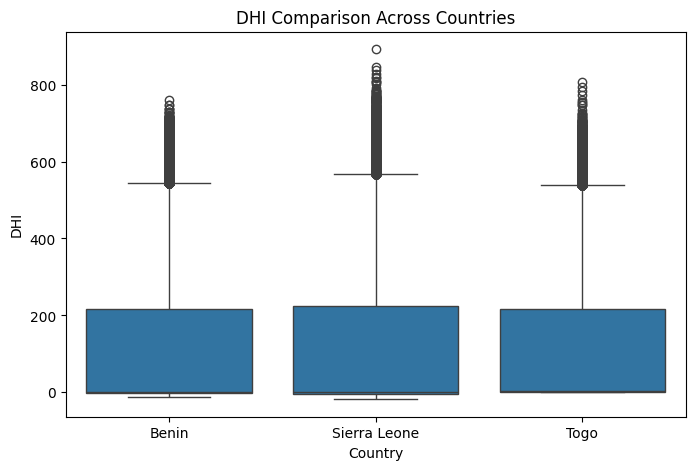

In [3]:
# Visual comparison of key metrics across countries 
import matplotlib.pyplot as plt
import seaborn as sns

# Combine datasets with a country column
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierra_leone, togo])

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Comparison Across Countries')
    plt.show()


In [4]:
# Suammarize key statistics
summary = df_all.groupby('Country')[['GHI','DNI','DHI']].agg(['mean','median','std'])
print(summary)


                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  


In [5]:
# statistical tests to compare means
from scipy.stats import f_oneway, kruskal

ghi_benin = benin['GHI']
ghi_sierra = sierra_leone['GHI']
ghi_togo = togo['GHI']

# ANOVA
anova_res = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print('ANOVA p-value:', anova_res.pvalue)

# If data not normally distributed, use Kruskal-Wallis
kruskal_res = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print('Kruskal-Wallis p-value:', kruskal_res.pvalue)


ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0


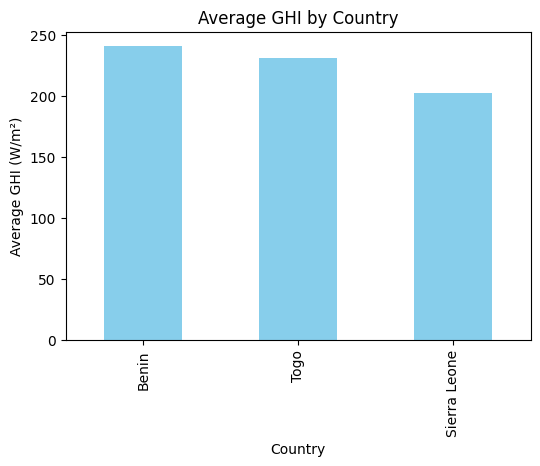

In [6]:
# Bar plot of average GHI by country
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', figsize=(6,4), color='skyblue', title='Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.show()
